In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
house = pd.read_parquet('../data/clean_house.parquet')

In [3]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.preprocessing as sk
from sklearn.compose import make_column_transformer

### No transformations or OHE 

In [4]:
# R2 = .4931
base = ['sqft_living']
y = house.price

In [5]:
# R2 = .5623
simple = ['sqft_living','waterfront','grade_value']
y = house.price

In [6]:
# R2 = .6493
many = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','sqft_above','sqft_basement', 'yr_built','yr_renovated','sqft_living15','sqft_lot15','month','grade_value','renovated','yr_since_renovate','total_rooms']
y = house.price

In [7]:
# R2 = .7017
coef_most = house.drop(['id','date','grade','price','total_rooms','yr_since_renovate','yr_renovated'],axis=1)
colsx = list(coef_most.columns)
y = house.price

### No Transformation with OHE to get coefficients

In [ ]:
# R2 = .7298
# Simple version
ohe_simple = ['zipcode','sqft_living']
y = house.price

In [48]:
# R2 = .7969
# Kept the most important variables to get my baseline model I used to get my coefficients
coef_all = house.drop(['id','date','grade','price','total_rooms','sqft_basement','sqft_above','has_view','yr_renovated','yr_since_renovate'],axis=1)
coefx = list(coef_all.columns)
y = house.price

### Transformationed Price without OHE

In [9]:
# R2 = .4494
base_trans = ['sqft_living']
y = np.log(house.price)

In [10]:
# R2 = .5531
simple_trans = ['sqft_living','waterfront','grade_value']
y = np.log(house.price)

In [11]:
# R2 = .6403
many_trans = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','sqft_above','sqft_basement', 'yr_built','yr_renovated','sqft_living15','sqft_lot15','month','grade_value','renovated','yr_since_renovate','total_rooms']
y = np.log(house.price)

In [12]:
# R2 = .7667
all_trans = house.drop(['id','date','grade','price'],axis=1)
tpcolsx = list(all_trans.columns)
y = np.log(house.price)

### Transformation Price with OHE 

In [13]:
# R2 = .8232
ohe_base = ['zipcode','sqft_living']
y = np.log(house.price)

### Log Transformation Price and sqft_living with OHE

In [14]:
# R2 = .8524
ohe_simple = ['zipcode','sqft_living','grade_value','waterfront']
y = np.log(house.price)

In [20]:
# R2 = .8732
trainheavy = ['zipcode','sqft_living','grade_value','waterfront','view','bedrooms','condition','yr_since_renovate','sqft_lot']
y = np.log(house.price)

In [21]:
# R2 = .8748
trainheavy2 = ['zipcode','sqft_living','grade_value','waterfront','view','bedrooms','condition','yr_since_renovate','sqft_lot', 'sqft_living15']
y = np.log(house.price)

In [22]:
# R2 = .8773
trainheavy3 = ['zipcode','sqft_living','grade_value','waterfront','view','bedrooms','condition','yr_since_renovate','sqft_lot', 'sqft_living15', 'sqft_above']
y = np.log(house.price)

In [23]:
# R2 = .8784
trainheavy4 = ['zipcode','sqft_living','grade_value','waterfront','view','bedrooms','condition','yr_since_renovate','sqft_lot', 'sqft_living15', 'sqft_above','total_rooms']
y = np.log(house.price)

### 11 Variable Log Transformed on Price and sqfts with OHE

In [24]:
# R2 = .8779
trainmost = house.drop(['id','date','grade','price','sqft_above','sqft_basement','has_view','total_rooms','yr_since_renovate','yr_renovated','lat','long','bedrooms','floors','yr_built'],axis=1)
tcol = list(trainmost.columns)
y = np.log(house.price)

### Final Model!!! Log Transformation on All with OHE

In [25]:
# R2 = .8826
trainall = house.drop(['id','date','grade','price'],axis=1)
tcolsx = list(trainall.columns)

### Run Linear Regression Model

In [54]:
#Declare X variable from model choices. Y is defined in each data to use for X
# Takes in a list of columns in the house dataframe
X = house[tcolsx]

In [55]:
# Train test split using .33
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =.33, random_state = 42)

In [56]:
#One Hot Encode Zipcode

#Have to comment these 4 blocks of code if One Hot Encoding is not being used
ohe = sk.OneHotEncoder()
transformed_train = ohe.fit_transform(X_train[['zipcode']])
X_train[ohe.categories_[0]] = transformed_train.toarray()

transformed_test = ohe.fit_transform(X_test[['zipcode']])
X_test[ohe.categories_[0]] = transformed_test.toarray()

transformed_x = ohe.fit_transform(X[['zipcode']])
X[ohe.categories_[0]] = transformed_x.toarray()

#Drop Zipcode and the most common zipcode as they are already being accounted for
X_train.drop(['zipcode',98103],axis=1,inplace=True)
X_test.drop(['zipcode',98103],axis=1,inplace=True)
X.drop(['zipcode',98103],axis=1,inplace=True)

# Have to comment out these any combination of these 6 blocks of code transformations if they don't exist 
# in the X or if transformation isn't being used

X_train['sqft_living'] = np.log(X_train.sqft_living)
X_test['sqft_living'] = np.log(X_test.sqft_living)
X['sqft_living'] = np.log(X.sqft_living)

X_train['sqft_living15'] = np.log(X_train.sqft_living15)
X_test['sqft_living15'] = np.log(X_test.sqft_living15)
X['sqft_living15'] = np.log(X.sqft_living15)

X_train['sqft_lot'] = np.log(X_train.sqft_lot)
X_test['sqft_lot'] = np.log(X_test.sqft_lot)
X['sqft_lot'] = np.log(X.sqft_lot)

X_train['sqft_lot15'] = np.log(X_train.sqft_lot15)
X_test['sqft_lot15'] = np.log(X_test.sqft_lot15)
X['sqft_lot15'] = np.log(X.sqft_lot15)

# X_train['sqft_above'] = np.log(X_train.sqft_above)
# X_test['sqft_above'] = np.log(X_test.sqft_above)
# X['sqft_above'] = np.log(X.sqft_above)

# X_train['sqft_basement'] = np.log(1 + X_train.sqft_basement)
# X_test['sqft_basement'] = np.log(1 + X_test.sqft_basement)
# X['sqft_basement'] = np.log(1 + X.sqft_basement)

#Fit X and y train
model.fit(X_train, y_train)

#Predict on X test
predictions = model.predict(X_test)

#Predict on X to see how accurate the model was using all data
predictions_all = model.predict(X)

#Get test and train R^2 for both y test and y train to check for over or under fitting
r2_test = r2_score(y_test, predictions)
r2_train = r2_score(y_train, model.predict(X_train))

#rmse = mean_squared_error(y_test, predictions, squared=False)

# Print out R2 scores of the Test and the Train
print('Test R2: ',r2_test, 
      '\nTrain R2:',r2_train)

C:\Users\capta\AppData\Local\Temp\ipykernel_13924\3772400935.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[ohe.categories_[0]] = transformed_x.toarray()
C:\Users\capta\AppData\Local\Temp\ipykernel_13924\3772400935.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[ohe.categories_[0]] = transformed_x.toarray()
C:\Users\capta\AppData\Local\Temp\ipykernel_13924\3772400935.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

Test R2:  0.7297977940476903 
Train R2: 0.7292824226226031


C:\Users\capta\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int64', 'str']. An error will be raised in 1.2.
  warnings.warn(


### Get Coefficients of the Model

In [29]:
model.coef_

array([-8.60510551e-03,  4.60967606e-02,  2.76293049e-01,  6.91677032e-02,
       -2.00330511e-02,  5.03867838e-01,  5.75913928e-02,  5.47409151e-02,
        8.78769753e-05,  8.33615916e-06, -4.13653516e-05,  4.40325165e-03,
        5.79691295e-01, -4.14608165e-01,  1.65241321e-01, -1.88721496e-02,
       -4.83674843e-03,  8.61719983e-02,  1.31123907e-02, -8.70768680e+00,
        1.12361621e-04, -3.05997590e-03, -6.18456292e-01, -6.00571894e-01,
       -6.11678087e-01,  3.35817571e-01, -3.96429575e-02, -8.32889753e-02,
       -8.23069904e-02, -8.97226233e-02, -2.97538492e-01, -3.99565297e-01,
       -3.78903193e-01, -4.35925644e-01, -4.04272171e-01, -6.89566301e-01,
       -1.89517969e-01, -1.46903518e-01, -4.58921557e-01, -4.62208534e-02,
       -5.70594009e-01, -5.74842268e-01, -6.72307298e-01, -5.72991517e-03,
       -2.87695183e-01, -3.92281230e-01,  4.84627017e-01,  1.20392696e-01,
       -5.28393934e-01, -1.90924686e-01, -1.42376051e-01, -1.64244287e-01,
       -5.21943014e-01, -

In [30]:
# Zip together columns and the coefs to get labels
list(zip(X_train.columns, model.coef_))

[('bedrooms', -0.008605105509117254),
 ('bathrooms', 0.04609676057557423),
 ('sqft_living', 0.276293049309055),
 ('sqft_lot', 0.06916770316930197),
 ('floors', -0.020033051067107177),
 ('waterfront', 0.5038678383255906),
 ('view', 0.05759139281287831),
 ('condition', 0.05474091513694919),
 ('sqft_above', 8.787697528130425e-05),
 ('sqft_basement', 8.336159164679113e-06),
 ('yr_built', -4.136535164123156e-05),
 ('yr_renovated', 0.0044032516463449745),
 ('lat', 0.579691294604509),
 ('long', -0.4146081648171582),
 ('sqft_living15', 0.1652413209347244),
 ('sqft_lot15', -0.01887214964867126),
 ('month', -0.004836748428346298),
 ('grade_value', 0.08617199829293813),
 ('has_view', 0.013112390667348602),
 ('renovated', -8.707686795524912),
 ('yr_since_renovate', 0.00011236162131628147),
 ('total_rooms', -0.0030599758971699975),
 (98001, -0.6184562917299038),
 (98002, -0.6005718944797386),
 (98003, -0.6116780871423246),
 (98004, 0.33581757124285055),
 (98005, -0.03964295746616593),
 (98006, -0.0

### Take Predicted Price to Compare with Actual Price

In [31]:
# Convert X Test prediction to DataFrame
pred = pd.DataFrame(predictions)

# Convert X prediction to DataFrame
pred_all = pd.DataFrame(predictions_all)

In [32]:
# Convert y test and y to DataFrame
actual = pd.DataFrame(y_test)
actual_all = pd.DataFrame(y)

#Set the pred index to the actual index
pred.index = actual.index
pred_all.index = actual_all.index

In [33]:
# Combine pred and actual into a DataFrame for both y test and y
preds_df = pd.concat([pred,actual],axis=1)
preds_df_all = pd.concat([pred_all,actual_all],axis=1)

# Create residual column that is the difference of the predicted and the actual for both y test and y actual
preds_df['residual'] = preds_df[0] - preds_df['price']
preds_df_all['residual'] = preds_df_all['price'] - preds_df_all[0]

# Create new column of the absolute value of the residual column for both y test and y actual
preds_df['residual_abs'] = preds_df.residual.abs()
preds_df_all['residual_abs'] = preds_df_all.residual.abs()

In [34]:
# Get the values that are two standard deviations above and below the mean
two_std_above = preds_df_all.residual.mean()+(preds_df_all.residual.std()*2)
two_std_below = preds_df_all.residual.mean()-(preds_df_all.residual.std()*2)

### Find the Undervalued and Overvalued features

In [35]:
# Get all values of the combined DataFrame where the residual was two standard deviations above the mean
undervalued_res = preds_df_all[preds_df_all.residual >= two_std_above]

# Find all the X features where the residual was two standard deviations above the mean to examine what is being undervalued
undervalued = X[X.index.isin(undervalued_res.index)]

# Get all values of the combined DataFrame where the residual was two standard deviations below the mean
overvalued_res = preds_df_all[preds_df_all.residual <= two_std_below]

# Find all the X features where the residual was two standard deviations below the mean to examine what is being overvalued
overvalued = X[X.index.isin(overvalued_res.index)]

### Overvalued Features

In [36]:
# Standardize the overvalued features and sort by the most overvalued
pd.DataFrame((overvalued.mean()-X.mean())/overvalued.mean()).sort_values(by=0,ascending=False).head(20)

,0
98146,0.692817
98118,0.692503
waterfront,0.677427
98168,0.603780
98106,0.568246
98010,0.484472
98070,0.482999
98055,0.481895
98198,0.458696
98166,0.438811


### Undervalued Features

In [37]:
# Standardize the undervalued features and sort by the most overvalued
pd.DataFrame((undervalued.mean()-X.mean())/undervalued.mean()).sort_values(by=0,ascending=False).head(20)

,0
98010,0.823685
98118,0.762839
98146,0.633265
98122,0.630719
98033,0.603927
98014,0.593972
98112,0.588952
waterfront,0.581693
view,0.532302
has_view,0.490191


### Dig into the zipcodes that were most undervalued

In [38]:
house.has_view.mean()

0.09784219299870346

In [39]:
house.waterfront.mean()

0.006760511205778848

In [40]:
house.grade_value.mean()

7.657945915910354

In [41]:
house.sqft_living.mean()

2080.343165401

In [42]:
house.renovated.mean()

0.03445082422670865

In [43]:
house.price.mean()

540291.9567512502

In [44]:
# Filter house data for the top 5 undervalued zipcodes
zipcode = house[house.zipcode.isin([98010, 98118, 98146, 98122, 98033])]

# Create DataFrames of the means of the top features grouped by zipcode and sorted by highest value
zipcode_view = pd.DataFrame(zipcode.groupby('zipcode').has_view.mean()).sort_values(by='has_view', ascending=False)
zipcode_water = pd.DataFrame(zipcode.groupby('zipcode').waterfront.mean()).sort_values(by='waterfront', ascending=False)
zipcode_grade = pd.DataFrame(zipcode.groupby('zipcode').grade_value.mean()).sort_values(by='grade_value', ascending=False)
zipcode_sqft = pd.DataFrame(zipcode.groupby('zipcode').sqft_living.mean()).sort_values(by='sqft_living', ascending=False)
zipcode_ren = pd.DataFrame(zipcode.groupby('zipcode').renovated.mean()).sort_values(by='renovated', ascending=False)
zipcode_price = pd.DataFrame(zipcode.groupby('zipcode').price.mean()).sort_values(by='price', ascending=False)


# Print values of all the DataFrames created above
zipcode_view,zipcode_water, zipcode_grade, zipcode_sqft,zipcode_ren,zipcode_price

(         has_view
 zipcode          
 98146    0.142361
 98033    0.141204
 98118    0.114398
 98122    0.089655
 98010    0.040000,
          waterfront
 zipcode            
 98146      0.020833
 98033      0.006944
 98118      0.005917
 98010      0.000000
 98122      0.000000,
          grade_value
 zipcode             
 98033       8.076389
 98122       7.744828
 98010       7.400000
 98118       6.976331
 98146       6.822917,
          sqft_living
 zipcode             
 98033    2381.340278
 98010    2137.590000
 98122    1785.048276
 98118    1689.303748
 98146    1621.451389,
          renovated
 zipcode           
 98010     0.100000
 98122     0.096552
 98146     0.069444
 98118     0.045365
 98033     0.041667,
                  price
 zipcode               
 98033    803990.819444
 98122    634558.144828
 98010    423665.990000
 98118    418019.360947
 98146    359496.260417)

The top zipcodes in each of the most important features have a higher value than the mean for the feature of the whole house DataFrame. This supports the argument that these zipcodes are undervalued as they have higher values for the most important features.

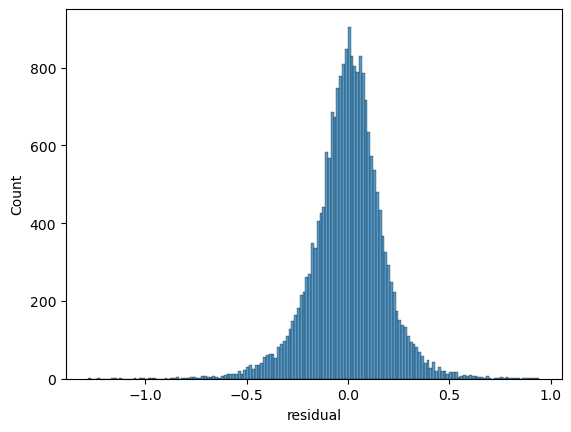

In [45]:
#Check distribution of the residuals - it looks very normal
sns.histplot(preds_df_all.residual);

### Visualizing How Well the Model Performed

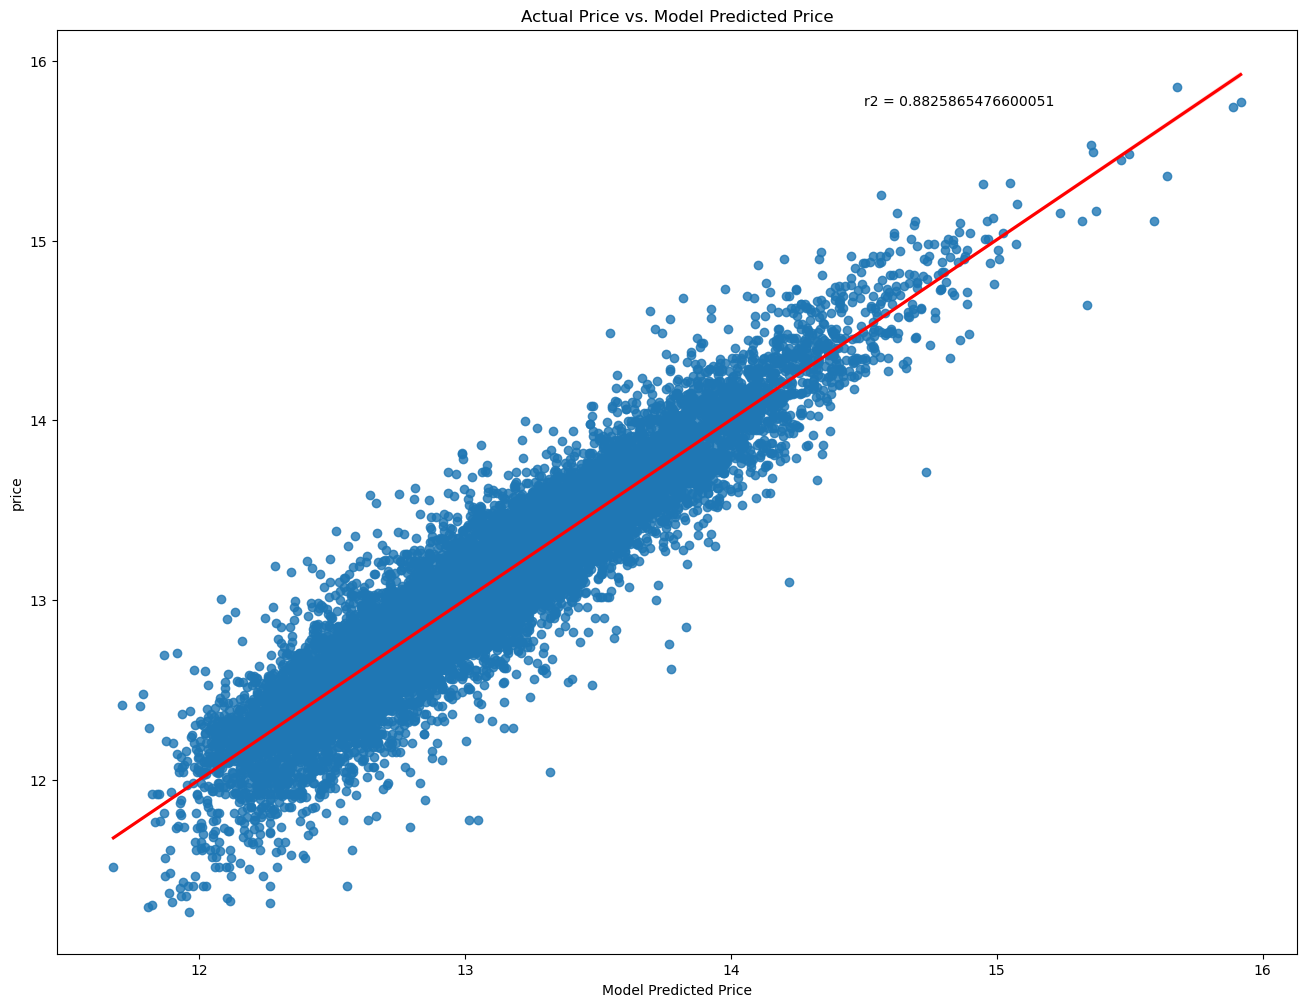

In [46]:
fig, ax = plt.subplots(figsize=(16,12))
sns.regplot(x=preds_df_all[0],y=preds_df_all['price'],line_kws={"color": "red"})
plt.xlabel('Model Predicted Price')
plt.title('Actual Price vs. Model Predicted Price')
plt.annotate(f'r2 = {r2_test}',xy=(14.5,15.75));

### Multiple One Hot Encodes

#### Not used in this project but wanted to keep the code for

In [47]:
# ohe.fit(X_train[['zipcode', 'has_view']])
# train_ohe = ohe.transform(X_train[['zipcode', 'has_view']]).toarray()
# test_ohe = ohe.transform(X_test[['zipcode', 'has_view']]).toarray()

# train_ohe = pd.DataFrame(train_ohe, columns = ohe.get_feature_names())
# test_ohe = pd.DataFrame(test_ohe, columns = ohe.get_feature_names())

# train_ohe.drop(['x0_98103','x1_0'],axis=1)
# test_ohe.drop(['x0_98103','x1_0'],axis=1)

# train_ohe = pd.concat([X_train,train_ohe],axis=1)
# test_ohe = pd.concat([X_test,test_ohe],axis=1)

# train_ohe['sqft_living'] = np.log(train_ohe.sqft_living)
# test_ohe['sqft_living'] = np.log(test_ohe.sqft_living)

# train_ohe['sqft_living15'] = np.log(train_ohe.sqft_living15)
# test_ohe['sqft_living15'] = np.log(test_ohe.sqft_living15)

# train_ohe['sqft_lot'] = np.log(train_ohe.sqft_lot)
# test_ohe['sqft_lot'] = np.log(test_ohe.sqft_lot)

# train_ohe['sqft_lot15'] = np.log(train_ohe.sqft_lot15)
# test_ohe['sqft_lot15'] = np.log(test_ohe.sqft_lot15)

# train_ohe['sqft_above'] = np.log(train_ohe.sqft_above)
# test_ohe['sqft_above'] = np.log(test_ohe.sqft_above)

# train_ohe['sqft_basement'] = np.log(1 + train_ohe.sqft_basement)
# test_ohe['sqft_basement'] = np.log(1 + test_ohe.sqft_basement)

# train_ohe[np.any(np.isnan(train_ohe))== True]

# #train_ohe.describe()
# # model.fit(train_ohe,y_train)
# # predictions = model.predict(test_ohe)
# # r2 = r2_score(y_test, predictions)
# # r2
